In [1]:
# Mapping data from GLEA, 1993-2013

In [28]:
#packages
import geopandas
import numpy as np
import pandas as pd
import datetime
from shapely.geometry import Point
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<class 'shapely.geometry.multipolygon.MultiPolygon'>


<Axes: >

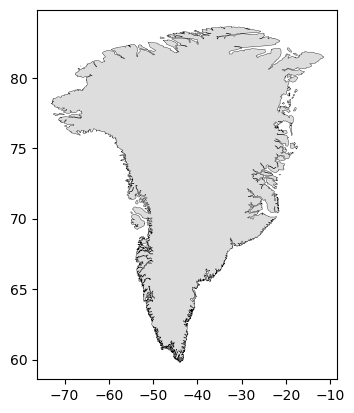

In [3]:
#Get GEOJSON
country = geopandas.read_file("./Greenland_Shape.json")
#print(country.head())
print(type(country.geometry[0]))
country.plot(color='#DDDDDD', edgecolor='#000000', linewidth = 0.25)
# or country.boundary.plot(color='#666666')

In [4]:
quakeData = pd.read_csv('./GLEA_1993_2013_merged_headers.txt', sep='\s+')
quakeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        444 non-null    float64
 1   long       444 non-null    float64
 2   amp        444 non-null    float64
 3   azimuth    444 non-null    int64  
 4   timeshift  444 non-null    float64
 5   year       444 non-null    int64  
 6   month      444 non-null    int64  
 7   day        444 non-null    int64  
 8   hour       444 non-null    int64  
 9   minute     444 non-null    int64  
 10  second     444 non-null    float64
 11  o_lat      444 non-null    float64
 12  o_long     444 non-null    float64
 13  MSW        444 non-null    float64
 14  region     444 non-null    object 
 15  type       444 non-null    int64  
 16  UID        444 non-null    object 
dtypes: float64(8), int64(7), object(2)
memory usage: 59.1+ KB


In [17]:
quakeData['coords'] = quakeData[['long', 'lat']].values.tolist()  # Get coordinate values into a 2d list
quakeData['coords'] = quakeData['coords'].apply(Point)            # Convert coordinates into a point data type

# single date column accurate to day
quakeData['date'] = pd.to_datetime(quakeData[['year', 'month', 'day']])
quakeData['dateToOrdinal'] = quakeData['date'].map(pd.Timestamp.toordinal)

quakeDataGeo = geopandas.GeoDataFrame(quakeData, columns=['year', 'date', 'dateToOrdinal', 'amp', 'MSW', 'coords'], geometry='coords')  # Convert dataset to geodataframe.GeoDataFrame, append 'coords' as geometry
quakeDataGeo.head()

,year,date,dateToOrdinal,amp,MSW,coords
0,1993,1993-01-24,727587,1.97,5.1,POINT (-32.94000 68.63000)
1,1993,1993-07-26,727770,0.63,4.9,POINT (-40.87000 65.23000)
2,1993,1993-08-05,727780,0.75,4.9,POINT (-32.90000 68.58000)
3,1993,1993-08-24,727799,0.60,4.8,POINT (-33.12000 68.66000)
4,1993,1993-10-19,727855,0.35,4.8,POINT (-37.72000 66.38000)


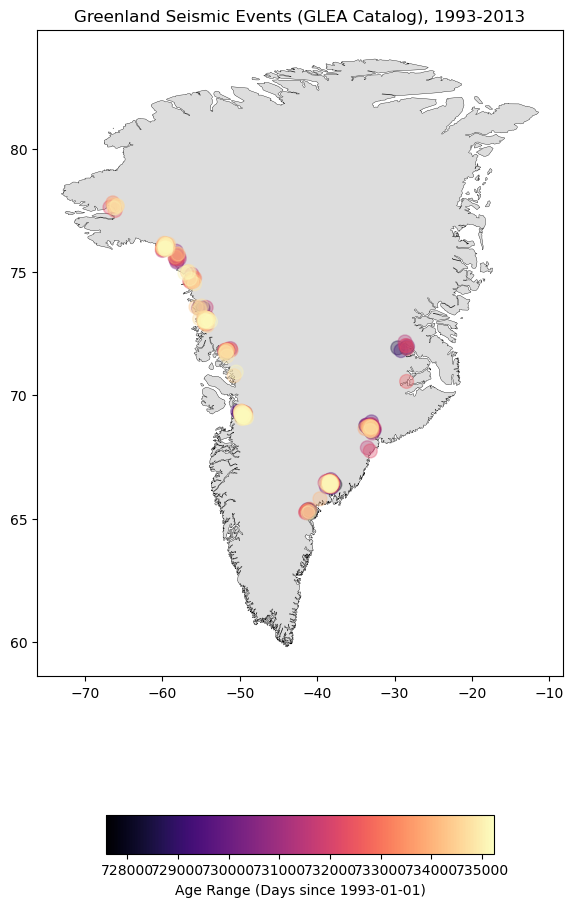

In [39]:
#fig, ax = plt.subplots(1, figsize=(10,5))

fig, ax = plt.subplots(figsize=(10, 12))

country.plot(
    ax=ax,
    color='#DDDDDD', 
    edgecolor='#000000', 
    linewidth = 0.25
)

norm = plt.Normalize(vmin=quakeData['dateToOrdinal'].min(), vmax=quakeData['dateToOrdinal'].max())
colors = matplotlib.colormaps.get_cmap('magma')(norm(quakeData['dateToOrdinal']))

scatter = ax.scatter(
    quakeDataGeo.geometry.x, 
    quakeDataGeo.geometry.y, 
    s=100,
    color=colors,
    alpha=0.35, 
    label='Age (1993-2013)'
)

#_ = ax.axis('off')

#plt.legend()

sm = plt.cm.ScalarMappable(cmap='magma', norm=norm)
#sm.set_array([])
plt.colorbar(sm, ax=ax, 
             shrink=0.5,
             aspect=10,
             orientation='horizontal',
             label='Age Range (Days since 1993-01-01)')

ax.set_title("Greenland Seismic Events (GLEA Catalog), 1993-2013", fontsize=12)

plt.savefig('./GLEACatalogEvents_ColorDate.png', bbox_inches='tight')
plt.show()


/tmp/ipykernel_291066/3167304431.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


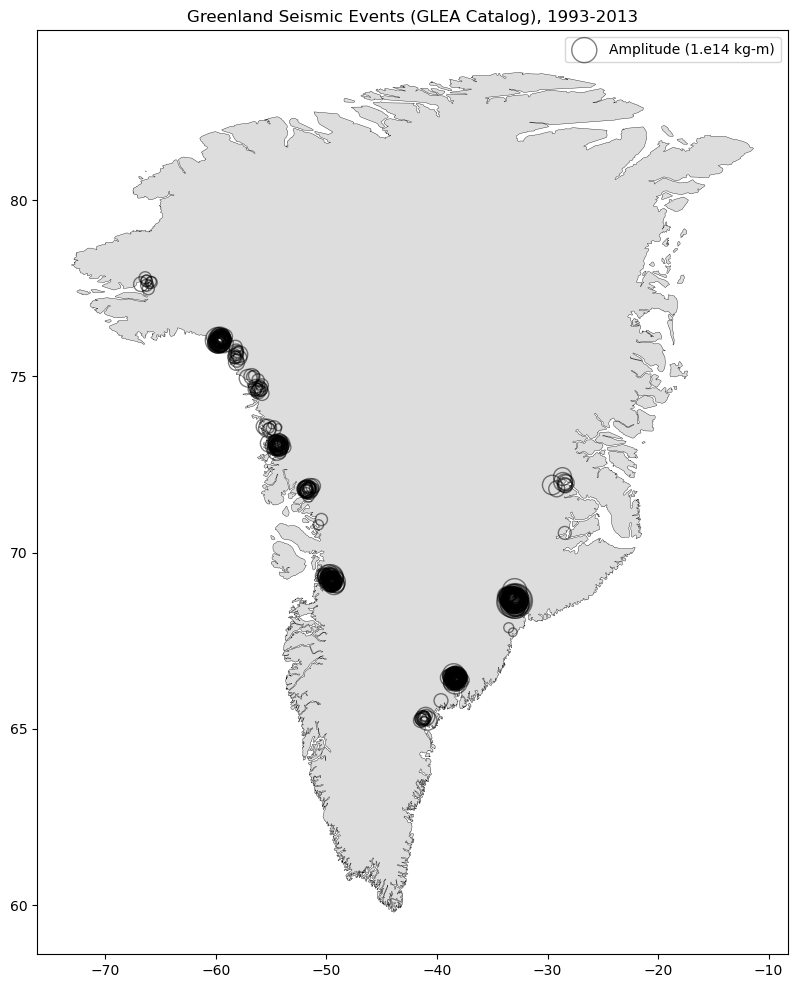

In [42]:
#fig, ax = plt.subplots(1, figsize=(10,5))

fig, ax = plt.subplots(figsize=(10, 12))

country.plot(
    ax=ax,
    color='#DDDDDD', 
    edgecolor='#000000', 
    linewidth = 0.25
)

# Scatter plot
#normalize magnitude data 
#mswScaled = 25+500*(quakeDataGeo['MSW'] - quakeDataGeo['MSW'].min()) / (quakeDataGeo['MSW'].max() - quakeDataGeo['MSW'].min())
ampScaled = 25+600*(quakeDataGeo['amp'] - quakeDataGeo['amp'].min()) / (quakeDataGeo['amp'].max() - quakeDataGeo['amp'].min())

scatter = ax.scatter(
    quakeDataGeo.geometry.x, 
    quakeDataGeo.geometry.y, 
    s=ampScaled, 
    #c=ampScaled, 
    cmap='viridis', 
    color='none',
    alpha=0.5, 
    edgecolor="k",
    label='Amplitude (1.e14 kg-m)'
)

plt.legend()
ax.set_title("Greenland Seismic Events (GLEA Catalog), 1993-2013", fontsize=12)

plt.savefig('./GLEACatalogEvents_Amplitude.png', bbox_inches='tight')
plt.show()
